In [1]:
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/cleaning.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/data_loader.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected_v2.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected_vgg.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_connected_vgg19.py   
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/extractNet_simple.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/helper.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/metrics.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/trainer.py
!wget https://github.com/MNRKhan/aps360-project/raw/master/modules/visualizer.py

--2019-03-22 20:50:17--  https://github.com/MNRKhan/aps360-project/raw/master/modules/cleaning.py
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/cleaning.py [following]
--2019-03-22 20:50:17--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/modules/cleaning.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8214 (8.0K) [text/plain]
Saving to: ‘cleaning.py’

cleaning.py         100%[===================>]   8.02K  --.-KB/s    in 0s      

2019-03-22 20:50:17 (81.0 MB/s) - ‘cleaning.py’ saved [8214/8214]

--2019-03-22 20:50:18--

In [0]:
import numpy as np
import random
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from cleaning import *
from data_loader import *
from extractNet_connected_vgg19 import *
from helper import *
from metrics import *
from trainer import *
from visualizer import *

In [0]:
!rm -rf __MACOSX
!rm -rf *.zip

In [6]:
!wget https://github.com/MNRKhan/aps360-project/raw/master/datasets/val2017/data_super.zip

--2019-03-22 20:55:28--  https://github.com/MNRKhan/aps360-project/raw/master/datasets/val2017/data_super.zip
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/val2017/data_super.zip [following]
--2019-03-22 20:55:28--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/val2017/data_super.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9812038 (9.4M) [application/zip]
Saving to: ‘data_super.zip’

data_super.zip      100%[===================>]   9.36M  --.-KB/s    in 0.1s    

2019-03-22 20:55:29 (73.9 MB/s) - ‘data_sup

In [0]:
!unzip data_super.zip

In [0]:
!rm -rf __MACOSX
!rm -rf *.zip

In [0]:
batch_size = 64
lr = 0.005

In [0]:
# Set random seeds

torch.manual_seed(360)
np.random.seed(360)
random.seed(360)

# Form dataset

transform = transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = ImageMaskDataset("/content/data", transform)

# Dataset sizes

size = len(dataset)
   
train_size = int(0.6 * size)
valid_size = int(0.2 * size)
test_size = size - train_size - valid_size

# Splitting datasets
  
train_data, valid_data, test_data = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

# Making dataloader

train = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=0)
valid = DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=0)

In [18]:
print(len(valid_data))

155


In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = extractNet_connected_vgg19()
net.to(device)

print("Model is being trained on:", device)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.torch/models/vgg19-dcbb9e9d.pth
574673361it [00:11, 51133053.63it/s]


Model is being trained on: cuda:0


In [0]:
torch.cuda.empty_cache()

Epoch:0, Train IoU:0.3700, Train Loss:0.0124|Valid IoU:0.3725, Valid Loss:0.0139
Epoch:1, Train IoU:0.3702, Train Loss:0.0123|Valid IoU:0.3725, Valid Loss:0.0138
Epoch:2, Train IoU:0.3904, Train Loss:0.0123|Valid IoU:0.3931, Valid Loss:0.0137
Epoch:3, Train IoU:0.4147, Train Loss:0.0122|Valid IoU:0.4176, Valid Loss:0.0136
Epoch:4, Train IoU:0.4417, Train Loss:0.0120|Valid IoU:0.4431, Valid Loss:0.0135
Epoch:5, Train IoU:0.4874, Train Loss:0.0118|Valid IoU:0.4873, Valid Loss:0.0134
Epoch:6, Train IoU:0.5020, Train Loss:0.0118|Valid IoU:0.4997, Valid Loss:0.0131
Epoch:7, Train IoU:0.5236, Train Loss:0.0117|Valid IoU:0.5214, Valid Loss:0.0130
Epoch:8, Train IoU:0.5342, Train Loss:0.0116|Valid IoU:0.5306, Valid Loss:0.0129
Epoch:9, Train IoU:0.5266, Train Loss:0.0116|Valid IoU:0.5196, Valid Loss:0.0130
Epoch:10, Train IoU:0.5435, Train Loss:0.0115|Valid IoU:0.5365, Valid Loss:0.0127
Epoch:11, Train IoU:0.5468, Train Loss:0.0114|Valid IoU:0.5374, Valid Loss:0.0128
Epoch:12, Train IoU:0.5479

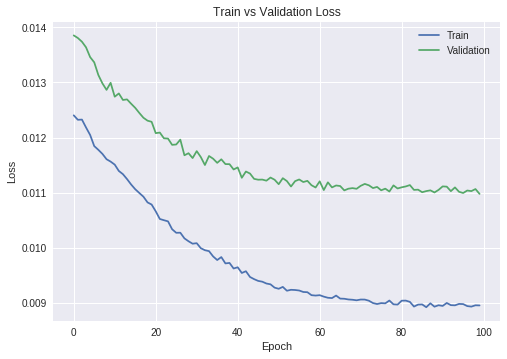

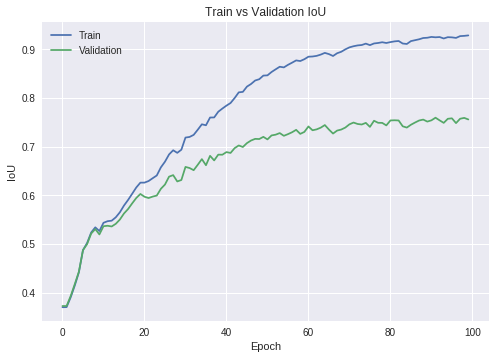

In [22]:
trainModel(net, train, valid, batch_size=batch_size, lr=lr, num_epochs=100, checkpoint=True, device=device)

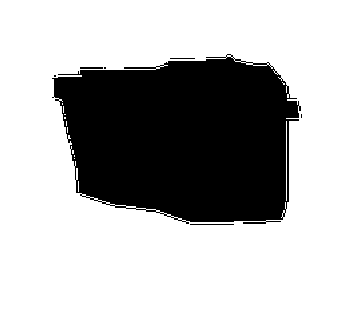

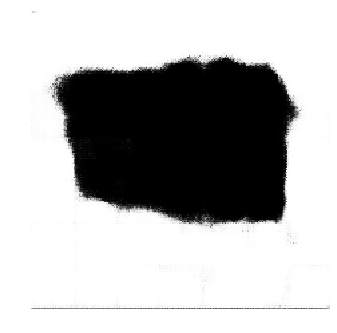

<Figure size 576x396 with 0 Axes>

In [24]:
net.to("cpu")

# After training (train set)
img, target = train_data[0]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(net(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
imshow(target)
imshow(out)

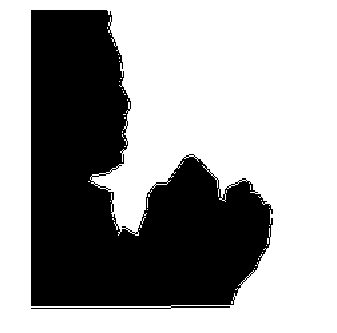

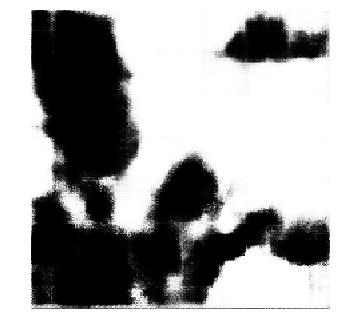

<Figure size 576x396 with 0 Axes>

In [34]:
# After training (train set)
img, target = valid_data[-100]
target = target.squeeze(0).detach().numpy()
out = torch.sigmoid(net(img.unsqueeze(0)))
out = out.squeeze(0).squeeze(0).detach().numpy()
imshow(target)
imshow(out)

In [40]:
net.to(device)

extractNet_connected_vgg19(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace)
      (16): Conv2d(256, 256, k

In [51]:
trainModel(net, train, valid, batch_size=batch_size, lr=lr, num_epochs=100, checkpoint=True, device=device)

RuntimeError: ignored

In [0]:
#saves only the deconv weights from the 
#given state dictionary
def get_dc_state(state):
    my_state = {name: param for name, param in state.items() if "deconv" in name}
    
    return my_state

#given a model with pretrained and decoder states
#update the decoder ones with the dc_state dictionary
def update_dc_state(model_state, dc_state):
    
    for name, param in dc_state.items():
        model_state[name] = param
    return model_state

#given model
#and dc states
#updates only the dc states (not pretrained) 
def load_state_from_dc(model, dc_path):
    dc_state = torch.load(dc_path)
    new_model_dict = update_dc_state(model.state_dict(), dc_state)

    model.load_state_dict(new_model_dict)
    
    return model

In [0]:
state = torch.load("model_lr=0.0001_bs=64_epoch=91")

In [0]:
my_state = get_dc_state(state)
torch.save(my_state, "vgg19_model_lr=0.0001_bs=64_epoch=91_dc_all")

In [0]:
torch.cuda.is_available()

True

In [0]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [0]:
!nvidia-smi

Fri Mar 22 00:50:14 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.43       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    31W / 149W |     11MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  